In [28]:
import src.ArrayGen as q
import sympy as sp
import numpy as np
from typing import Any, List, Tuple, Union, Dict, Optional
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import math

In [26]:
import numpy as np
from typing import Optional, Tuple, Union, Any
import matplotlib.pyplot as plt
import sympy as sp

import ipywidgets as widgets
from ipywidgets import interact
from numpy import ndarray, dtype
from numpy.lib._function_base_impl import _ScalarT1, _ScalarT2


def projectile_motion_widget(
        formula_str="x*tan(theta) - (g/(2*u**2*cos(theta)**2))*x**2",
        u = 10.0, theta_deg = 45.0, g = 9.8, x_max = 11.0
):
    x = sp.symbols('x')
    u_sym, theta_sym, g_sym = sp.symbols('u theta g')
    formula = sp.sympify(formula_str)

    theta = np.deg2rad(theta_deg)
    x_vals = np.linspace(0, x_max, 300)

    y_expr = formula.subs({'theta': theta, 'u': u, 'g': g})
    y_func = sp.lambdify(x, y_expr, modules=['numpy'])

    y_vals = y_func(x_vals)

    plt.figure(figsize=(7, 4))
    plt.plot(x_vals, y_vals, label="Trajectory")
    plt.title(f"Projectile Trajectory\nFormula: {formula_str}")
    plt.xlabel("Horizontal Distance (x)")
    plt.ylabel("Vertical Distance (y)")
    plt.ylim(bottom=0)
    plt.grid()
    plt.legend()
    plt.show()

interact(
    projectile_motion_widget,
    formula_str=widgets.Text(
        value="x*tan(theta) - (g/(2*u**2*cos(theta)**2))*x**2",
        description="y(x) Formula:",
        layout=widgets.Layout(width="80%")
    ),
    u=widgets.FloatSlider(min=1, max=50, step=0.1, value=10, description="u (velocity)"),
    theta_deg=widgets.FloatSlider(min=0, max=90, step=1, value=45, description="theta (angle)", continuous_update=False),
    g=widgets.FloatSlider(min=1, max=20, step=0.1, value=9.8, description="g (gravity)"),
    x_max=widgets.FloatSlider(min=5, max=50, step=0.5, value=11, description="Max X")
)



interactive(children=(Text(value='x*tan(theta) - (g/(2*u**2*cos(theta)**2))*x**2', description='y(x) Formula:'…

<function __main__.projectile_motion_widget(formula_str='x*tan(theta) - (g/(2*u**2*cos(theta)**2))*x**2', u=10.0, theta_deg=45.0, g=9.8, x_max=11.0)>

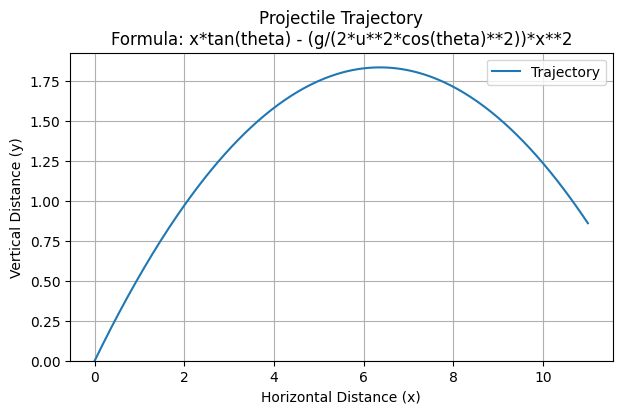

In [122]:
import numpy as np
import sympy as sp
from typing import Union, Tuple, Any, Optional

def expr(
    expr: str,
    loops: int = 10,
    negative: bool = True,
    vars_: str = 'x',
    **kwargs: Any
) -> Union[
     Tuple[np.ndarray, np.ndarray],
     Tuple[np.ndarray, np.ndarray, np.ndarray]
]:
    var_names = vars_.split()
    if not (1 <= len(var_names) <= 2):
        raise ValueError("Only one or two variables supported in 'vars', e.g., 'x' or 'x y'.")
    symbols = sp.symbols(var_names)
    try:
        expr_ = sp.sympify(expr)
    except Exception as exc:
        raise ValueError(f"Could not parse expression: {exc}")

    if len(symbols) == 1:
        func = sp.lambdify(symbols[0], expr_, modules=['numpy'])
        if negative:
            x_vals = np.arange(-loops, loops + 1)
        else:
            x_vals = np.arange(0, loops + 1)
        results = np.empty_like(x_vals, dtype=np.float64)
        for i, val in enumerate(x_vals):
            try:
                y = func(val)
                if np.isnan(y) or np.isinf(y):
                    y = 1.0
                results[i] = y
            except Exception:
                results[i] = 1.0
        return x_vals, results

    elif len(symbols) == 2:
        func = sp.lambdify(symbols, expr_, modules=['numpy'])
        x_range = kwargs.get("x_range", (-loops, loops))
        y_range = kwargs.get("y_range", (-loops, loops))
        if (not isinstance(x_range, (tuple, list)) or not isinstance(y_range, (tuple, list))
            or len(x_range) != 2 or len(y_range) != 2):
            raise ValueError("x_range and y_range must be tuples/lists with 2 integers each")
        x_vals = np.arange(x_range[0], x_range[1] + 1)
        y_vals = np.arange(y_range[0], y_range[1] + 1)
        X, Y = np.meshgrid(x_vals, y_vals)
        # Eval vectorized if possible, elementwise if fails
        try:
            Z = func(X, Y)
            mask = np.isnan(Z) | np.isinf(Z)
            Z[mask] = 1.0
        except Exception:
            nx, ny = X.shape
            Z = np.empty_like(X, dtype=np.float64)
            for i in range(nx):
                for j in range(ny):
                    try:
                        v = func(X[i, j], Y[i, j])
                        if np.isnan(v) or np.isinf(v):
                            v = 1.0
                    except Exception:
                        v = 1.0
                    Z[i, j] = v
        return X, Y, Z
    else:
        raise ValueError("Only 1 or 2 variables supported for evaluation.")


In [123]:
x, y, z = expr('sin(x) + 3*y', vars_='x y')
xx, yy = expr('x**2 + 1', vars_='x')

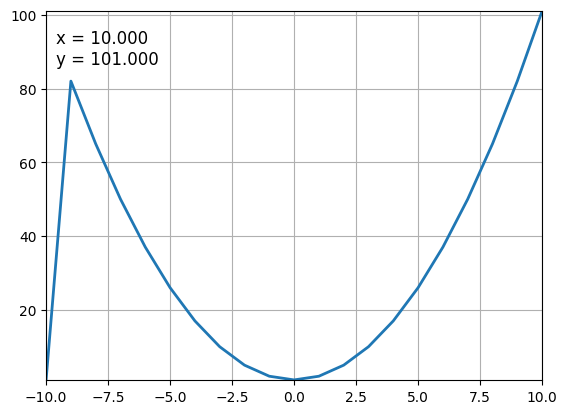

In [12]:
q.Graphing.plot(xx, yy, static=True)

In [17]:
def complex_plot(expr: np.ndarray, theta: np.ndarray, colormap: str = 'plasma') -> None:
    """
    Creates an Argand plot / complex plot via the expression and theta angle provided.

    Parameters
    ----------
    expr: np.ndarray
        This is the complex expression.
    theta: np.ndarray
        This is the angle of the complex expression.
    colormap: str
        This is purely for visual purposes, it changes the theme of the graph.

    Returns
    -------
    None -> Creates a plot.

    Raises
    ------
    None

    Examples
    --------
    ...

    """
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    colors = expr.real
    plt.scatter(theta, expr, c=colors, cmap=colormap)
    plt.show()


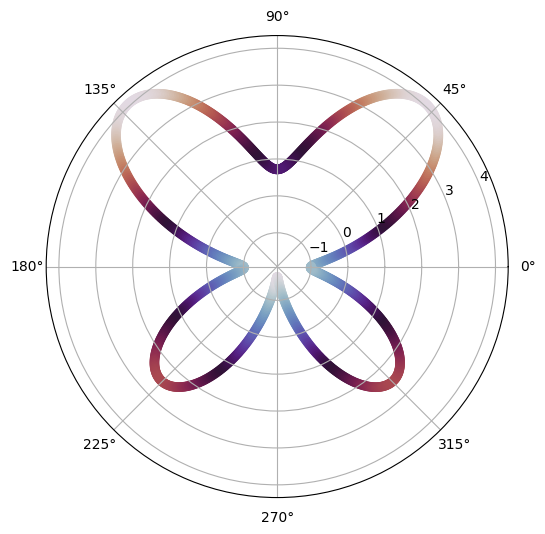

In [23]:

theta = np.linspace(0, 2*math.pi, 1000)
expr = np.exp(np.sin(theta)) - 2*  np.cos(4*theta) + np.sin((2*theta - np.pi) / 24) ** 5

# Radian system:
complex_plot(expr, theta, colormap='twilight')

In [117]:
class Graphing:
    @staticmethod
    def plot(
            x: Union[List[float], np.ndarray],
            y: Union[List[float], np.ndarray],
            z: Optional[np.ndarray] = None,
            centered: bool = False,
            static: bool = False,
            speed: int = 50,
            color=None,  # string or array or None
    ) -> None:
        if z is not None:
            Graphing._plot_2var(x, y, z, centered=centered, static=static, speed=speed, color=color)
        else:
            Graphing._plot_1var(x, y, centered=centered, static=static, speed=speed, color=color)

    @staticmethod
    def _plot_1var(x, y, centered, static, speed, color):
        fig, axis = plt.subplots()
        if static:
            axis.plot(x, y, lw=2, color=color)
        else:
            animated_plot, = axis.plot([], [], lw=2, color=color)
            # Animation code...

    @staticmethod
    def _plot_2var(X, Y, Z, centered, static, speed, color):
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        axis = fig.add_subplot(111, projection='3d')
        # (axis setup unchanged...)

        # Core logic for color/cmap handling
        surface_kwargs = {}
        if color is None:
            # Use default colormap
            surface_kwargs['cmap'] = 'viridis'
        elif isinstance(color, str):
            if color in plt.colormaps():
                # Named colormap, e.g., 'plasma', 'inferno'
                surface_kwargs['cmap'] = color
            else:
                # Assume it's a color name like 'red', 'skyblue', etc.
                surface_kwargs['color'] = color
        elif isinstance(color, np.ndarray) or isinstance(color, list):
            # If color is a 2D array, use as facecolors
            surface_kwargs['facecolors'] = color
        else:
            surface_kwargs['cmap'] = 'viridis'

        if static:
            axis.plot_surface(X, Y, Z, **surface_kwargs)
            plt.show()
        else:
            surface = [axis.plot_surface(X, Y, np.zeros_like(Z), **surface_kwargs)]
            def update(frame):
                if surface[0] is not None:
                    surface[0].remove()
                surface[0] = axis.plot_surface(
                    X[:frame, :], Y[:frame, :], Z[:frame, :], **surface_kwargs
                )
                return surface
            anim = FuncAnimation(
                fig=fig, func=update, frames=Z.shape[0]+1, interval=speed, blit=False
            )
            plt.show()


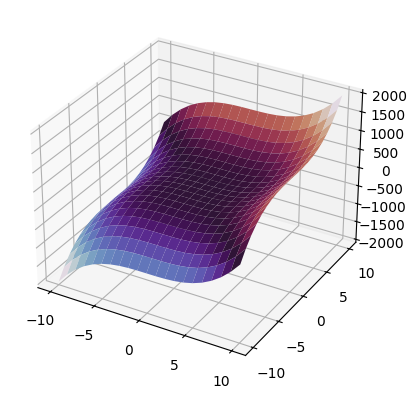

In [126]:
x, y, z = expr('x**3 + y**3', vars_="x y")
Graphing.plot(x, y, z=z, static=True, color='twilight')

In [67]:
from sympy import symbols, sin, expand, pretty, Eq
from IPython.display import display

x, y = symbols('x y')
expr = sin(x) + 3*y
display(expr)              # Jupyter will render this with LaTeX
print(pretty(expr))        # Terminal/console pretty formatting


3*y + sin(x)

3⋅y + sin(x)


In [96]:
from IPython.display import Math
from sympy import sin, cos, tan

def projectile_motion(
        u: float | str,
        theta_degrees: float | None = None,
        range_: Optional[float] = None,
        height_: Optional[float] = None,
        f_range: bool = False,
        f_height: bool = False,
        gravity: float = 9.8,
        graph: bool = True,
        grid: bool = True,
        graph_range_x: float = 50,
        graph_range_y: float = 50,
) -> Union[None, Tuple[float, np.ndarray, np.ndarray], Tuple[np.ndarray, np.ndarray]]:

    if isinstance(u, str):
        if u in ['?', 'help']:
            x_sym, u_sym, theta_sym, g_sym = symbols('x u theta g')
            R_expr = (u_sym ** 2 * sin(2 * theta_sym)) / g_sym
            h_expr = (u_sym ** 2 * sin(theta_sym) ** 2) / (2 * g_sym)
            y_expr = x_sym * tan(theta_sym) - (g_sym / (2 * u_sym ** 2 * cos(theta_sym) ** 2)) * x_sym ** 2

            # Show Range, Height, and Trajectory Equations in LaTeX
            q1 = """
            This is a function to get the projectile motion of a projectile.
            This can be done by using the following formula:
            """
            print(pretty(q1))
            e1 = r"y(x) = x\tan\theta - \frac{g}{2u^2 \cos^2\theta}x^2"
            display(Math(e1))

            print(pretty("""
            Herein, it iterates `x`, so that it traces out the entire
            """))

            #display(Math(r"R = \frac{u^2 \sin 2\theta}{g}"))
            #display(Math(r"h = \frac{u^2 \sin^2\theta}{2g}"))

        return None
    else:

        g = gravity
        theta = np.radians(theta_degrees)

        if f_range:
            R = (u ** 2 * np.sin(2 * theta)) / g
        elif f_height:
            R = (u ** 2 * (np.sin(theta) ** 2)) / (2 * g)
        else:
            R = (u ** 2 * np.sin(2 * theta)) / g

        x = np.linspace(0, R, 500)
        y = x * np.tan(theta) - (g / (2 * u ** 2 * np.cos(theta) ** 2)) * x ** 2

        if graph:
            plt.figure(figsize=(8, 5))
            plt.plot(x, y, label=f'u={u} m/s, θ={theta_degrees}°')
            plt.title('Projectile Trajectory')
            plt.xlabel('Horizontal distance (m)')
            plt.ylabel('Vertical distance (m)')
            plt.xlim(0, max(graph_range_x, x.max()))
            plt.ylim(0, max(graph_range_y, y.max()))
            plt.legend()
            plt.grid(grid)
            plt.show()
            return None

        if f_range or f_height:
            return R, x, y

        return x, y


In [97]:
projectile_motion('?')

                                                                            
            This is a function to get the projectile motion of a projectile.
                   This can be done by using the following formula:         
                                                                            


<IPython.core.display.Math object>

In [133]:
import os
os.getcwd()

'C:\\Users\\Titu\\PycharmProjects\\ArrayGen'

In [17]:
from IPython.display import display, Math
from sympy import symbols
a, b, theta = symbols('a b theta')
display(Math(r"x"))

<IPython.core.display.Math object>

In [116]:
from sympy import symbols, Eq, latex, solve, expand, simplify
from latex2sympy2 import latex2sympy
from IPython.display import display, Math

def friendly_explain_and_solve(equation_latex, substitutions, solve_for):
    print("=== Let's solve your equation step by step! ===\n")
    # 1. Parse the equation
    expr = latex2sympy(equation_latex)
    if isinstance(expr, list): expr = expr[0]
    print("Step 1: Converted your LaTeX equation into math symbols.")
    display(Math(latex(expr)))

    # 2. Substitute parameters
    if substitutions:
        for k, v in substitutions.items():
            print(f"Step 2: Substitute {k} = {v}.")
        sub_expr = expr.subs(substitutions)
        display(Math(latex(sub_expr)))
    else:
        sub_expr = expr

    # 3. Expand and simplify if meaningful
    simple = simplify(sub_expr)
    if simple != sub_expr:
        print("Step 3: Simplify/clean up the equation for clarity.")
        display(Math(latex(simple)))
    else:
        simple = sub_expr

    # 4. Move all terms to one side for solving
    if isinstance(simple, Eq):
        print(f"Step 4: Bring all terms to one side to prepare for solving.")
        rearranged = simple.lhs - simple.rhs
        display(Math(latex(rearranged) + " = 0"))
    else:
        rearranged = simple

    # 5. Solve for the variable
    print(f"Step 5: Solving for {solve_for}...")
    solution = solve(rearranged, symbols(solve_for))
    display(Math(f"{solve_for} = {latex(solution)}"))
    print("\n=== Done! ===")
    return solution

# === EXAMPLE CALLS ===

# Pure equation, no substitution
friendly_explain_and_solve("x^2 - 9 = 0", {}, "x")

# With substitution
friendly_explain_and_solve("y = x^2 + 1", {"x": 3}, "y")

# A labeled physics formula
friendly_explain_and_solve(
    r"y = x \tan{\theta} - \frac{g}{2u^2 \cos^2{\theta}} x^2",
    {"x": 3, "theta": 0.785, "g": 9.8, "u": 10},
    "y"
)


=== Let's solve your equation step by step! ===

Step 1: Converted your LaTeX equation into math symbols.


<IPython.core.display.Math object>

Step 4: Bring all terms to one side to prepare for solving.


<IPython.core.display.Math object>

Step 5: Solving for x...


<IPython.core.display.Math object>


=== Done! ===
=== Let's solve your equation step by step! ===

Step 1: Converted your LaTeX equation into math symbols.


<IPython.core.display.Math object>

Step 2: Substitute x = 3.


<IPython.core.display.Math object>

Step 5: Solving for y...


<IPython.core.display.Math object>


=== Done! ===
=== Let's solve your equation step by step! ===

Step 1: Converted your LaTeX equation into math symbols.


<IPython.core.display.Math object>

Step 2: Substitute x = 3.
Step 2: Substitute theta = 0.785.
Step 2: Substitute g = 9.8.
Step 2: Substitute u = 10.


<IPython.core.display.Math object>

Step 5: Solving for y...


<IPython.core.display.Math object>


=== Done! ===


[]

In [115]:
# ---- EXAMPLE USAGE ----

# 1. Quadratic:
solve_equation_latex_steps("x^2 - 5x + 6 = 0", {}, "x")

# 2. Physics trajectory:
solve_equation_latex_steps(
    r"y = x \tan{\theta} - \frac{g}{2u^2 \cos^2{\theta}} x^2",
    {"x": 3, "theta": 0.785, "g": 9.8, "u": 10},
    "y"
)

# 3. Assignment:
solve_equation_latex_steps("a = (x+1)^2", {"x": 3}, "a")


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
def factorial(num: int) -> int:
    if num < 0 or isinstance(num, float):
        raise ValueError('Cannot get factorials of negative numbers and decimal numbers.')
    elif num == 0 or num == 1:
        return 1
    else:
        return num * factorial(num - 1)



In [10]:
def permutations(out_of: int, select: int) -> int:
    res = factorial(out_of) / (factorial(select) * factorial(out_of - select))
    return res

56.0